In [2]:
#useful: https://github.com/fusion-flap/flap
import sys
sys.path.append(r"E:\marci main\Fusion\flap_module\flap")

import flap

sys.path.append(r"E:\marci main\Fusion\nti-wavelet-tools\python\utility")
import convert_dict_to_flap

import glob
import os
from scipy import io
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
import numpy as np
from scipy import signal
import copy
import time
import math

import scipy.signal
import scipy.fftpack
import scipy.integrate
import matplotlib.colors as colors

INIT flap storage


## Loading and creating dataobject

In [2]:
path ='E:\\marci main\\Fusion\\inputdata\\in\\'#pc
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

for filename in glob.glob(os.path.join(path, '*.sav')):
    loaded_sav = io.readsav(filename, python_dict = True)
    print('Loaded: '+filename)
    print('\n')

    #!!!
for i in range(loaded_sav["channels"].size):
    tmp = str(loaded_sav["channels"][i])
    loaded_sav["channels"][i] = tmp[2:-1]

#print(loaded_sav["channels"])

print(list(loaded_sav))
print(loaded_sav["coord_history"])
#print(loaded_sav['theta'].shape

Loaded: E:\marci main\Fusion\inputdata\in\AUGD_32326_MHA.sav


['expname', 'shotnumber', 'channels', 'data', 'timeax', 'theta', 'phi', 'data_history', 'coord_history']
b'Geometrical_Loaded-with-MTR'


In [12]:
path ='E:\\marci main\\Fusion\\saved_flap.flapdata'
#path =r'E:\marci main\Fusion\inputdata\in\AUGD_32326_MHA.sav'

if path[-9:] == ".flapdata":
    flap_object = flap.load(path)
    print("loaded:"+path)
if path[-4:] == ".sav":
    loaded_sav = io.readsav(path, python_dict=True)
    print("loaded:"+path)
    flap_object = convert_dict_to_flap.convert_dict_to_flap(loaded_sav)
    flap.save(flap_object,filename="saved_flap.flapdata")

loaded:E:\marci main\Fusion\saved_flap.flapdata


In [16]:
str(flap.list_data_objects(flap_object))


-----------------------------
<1>(data_source:"" exp_id:"AUGD 32326") data_title:"" shape:[24,200001][no error]
  Data name:"voltage", unit:"volt"
  Coords:
    'Time [s](Dims:1]) [<Equ.><R. symm.>] Start:  8.500E-01, Steps:  5.000E-07
    'Channels [a.u.](Dims:0, Shape:[24]) [<R. symm.>] Val:b'MHA-B31-14', b'MHA-B31-03', b'MHA-B31-01', b'MHA-B31-02', b'MHA-B31-12', b'MHA-B31-13', b'MHA-C04-01', b'MHA-C09-01_', b'MHA-B31-11', b'MHA-B31-10', ...
    'Theta [rad](Dims:0, Shape:[24]) [<R. symm.>] Val. range:  9.548E-02 -  6.181E+00
    'Phi [rad](Dims:0, Shape:[24]) [<R. symm.>] Val. range:  0.000E+00 -  6.791E+00


'\n-----------------------------\n<1>(data_source:"" exp_id:"AUGD 32326") data_title:"" shape:[24,200001][no error]\n  Data name:"voltage", unit:"volt"\n  Coords:\n    \'Time [s](Dims:1]) [<Equ.><R. symm.>] Start:  8.500E-01, Steps:  5.000E-07\n    \'Channels [a.u.](Dims:0, Shape:[24]) [<R. symm.>] Val:b\'MHA-B31-14\', b\'MHA-B31-03\', b\'MHA-B31-01\', b\'MHA-B31-02\', b\'MHA-B31-12\', b\'MHA-B31-13\', b\'MHA-C04-01\', b\'MHA-C09-01_\', b\'MHA-B31-11\', b\'MHA-B31-10\', ...\n    \'Theta [rad](Dims:0, Shape:[24]) [<R. symm.>] Val. range:  9.548E-02 -  6.181E+00\n    \'Phi [rad](Dims:0, Shape:[24]) [<R. symm.>] Val. range:  0.000E+00 -  6.791E+00'

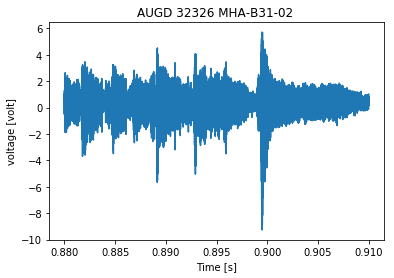

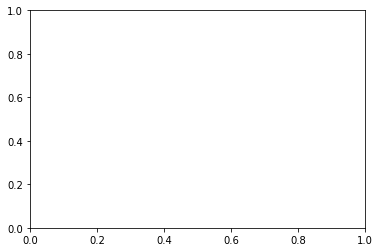

In [3]:
slicing_channel = 'MHA-B31-02'
sliced_object = flap_object.slice_data(slicing={"Channels":slicing_channel}).slice_data(slicing={"Time":flap.Intervals(0.88,0.91)})
sliced_object.exp_id = sliced_object.exp_id +" "+ slicing_channel

plt1 =sliced_object.plot()
#flap_object.plot(plot_type = 'multi xy')
#plt1.ylim(-6,2)
#flap.list_data_objects(sliced_object)

## Creating spectogram

In [ ]:
min_t=min(sliced_object.coordinate('Time')[0])
max_t=max(sliced_object.coordinate('Time')[0])
t = max_t-min_t
print(t)
s=sliced_object.data
samples = np.size(sliced_object.data)
s_rate=samples/t

nyquist=samples/2/t
frangemax=nyquist#200#

In [ ]:
win_r = 1500 #1000
d_win=35#random.randint(200,300)
std=300 #150
win_base = scipy.signal.gaussian(2*win_r+1, std=std)#np.wining(2*win_r+1)

z_padded_s = np.zeros (samples+2*win_r)
z_padded_s[win_r:-win_r] = s
z_padded_s[0:win_r]=np.average(z_padded_s[win_r+1:2*win_r])
z_padded_s[-win_r:]=np.average(z_padded_s[-2*win_r:-win_r-1])
x_win=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

plt.figure(figsize=(13,5))
plt.plot(z_padded_s,"-",linewidth = 2)#x_win,idő (s),max(x_win)
plt.xlim((0,samples+2*win_r))
plt.title('A kiegészített jel')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
plt.savefig('sxr2_p.pdf')
#plt.show()

win = np.zeros((int(samples/d_win+1), 2*win_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

z_win = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i<1000001:
        z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1]-np.average(z_padded_s [d_win*i:d_win*i+win_r+win_r+1]))
    #z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1])

plt.figure(figsize=(9,9))
plt.imshow(z_win,aspect='auto',cmap='bwr')#, extent=(min_t*s_rate/d_win,max_t*s_rate/d_win,max_t*s_rate,min_t*s_rate)
plt.title('Gauss ablak + eredeti jel')
plt.xlabel('Adatpont')
plt.ylabel('Ablak elcsúsztatása')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.90, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig('z_win.pdf')
#plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i % 1000 == 0:
        print('Calculating STFT...')
    if i<1000001:
        z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))**2

Requested? feature: refer to coodrinate with name (not using a for loop)

In [ ]:
stft_ax=copy.deepcopy(sliced_object.coordinates)

for c in stft_ax:
    if c.unit.name == 'Time':
        c.step = sliced_object.coordinates[0].step[0]*d_win
        break

stft_ax.append(flap.Coordinate(name="Frequency",
                          unit="kHz",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0.0,  #,
                          step=s_rate/(2*win_r+1)/1000,  #
                          dimension_list=[1]
                         ))

stft_object = flap.DataObject(
                      data_array = z_win_fft,
                      data_unit = flap.Unit(name= 'Power', unit= 'W'),
                      exp_id = str(loaded_sav['expname'])[2:-1],
                      coordinates = stft_ax, #[stft_ax[0],stft_ax[-1]],
                      data_shape=z_win_fft.shape
                     )

flap.list_data_objects(stft_object)

In [ ]:
plot = stft_object.slice_data(slicing={"Frequency":flap.Intervals(0,100)}).plot(axes = ['Time','Frequency'], plot_type = 'image')

In [ ]:
#%%script false
shot = ""

colornorm=colors.LogNorm(vmin=z_win_fft.min()*40000000, vmax=z_win_fft.max()/10)
logax = np.linspace(int(np.log10(z_win_fft.min())),int(np.log10(z_win_fft.max())),int(np.log10(z_win_fft.max()))-int(np.log10(z_win_fft.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,9))
img = plt.imshow(np.transpose(z_win_fft),cmap='plasma',  aspect='auto', extent=[min_t,max_t,nyquist/1000,0], norm=colornorm)#interpolation='gaussian',*30000000/4
#plt.title('39424-es kisülés, J051-es szonda STFT-je')
plt.title(shot+' szonda saját felüláteresztős szűrt STFT-je')
#plt.title('AUGD 34924, B31-40-es szonda STFT-je')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
plt.ylim(0,60)
#plt.xlim(1.9,2.4)
plt.subplots_adjust(right=0.90)
#plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#cbar.set_ticks(logax)
plt.savefig(shot+' '+str(min_t)+'-'+str(max_t)+' stft.pdf')#34924_40
plt.show()

#change plt to custom plotid

In [ ]:
print(sliced_object.coordinate('Time'))
print(stft_object.coordinate('Time'))

**Warning/ERROR: plot changes when coordinate start is 0 or 0.0 (int or double)**

In [ ]:
time_dummy = flap.Coordinate(name="Time",
                          unit="s",
                          mode = flap.CoordinateMode(equidistant=True),
                          start=0.0,
                          step=0.01,
                          #values=np.linspace(1,5,10)
                          dimension_list=[0]
                         )

data_array = np.sin(np.linspace(start=1,stop=10,num=1000))
x = np.linspace(start=1,stop=10,num=1000)

dummy= flap.DataObject(data_array = data_array,
                       data_unit = flap.Unit(name = "signal",unit = "volt"),#
                       coordinates = time_dummy,  #,value_dummy]
                       data_shape=data_array.shape
                     )

dummy.plot(plot_type = 'scatter')
plt.plot(x,data_array)